In [36]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [37]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype(np.float64)
y = mnist.target.astype(np.int64) 

sample_size = 10000
indices = random.sample(range(X.shape[0]), sample_size)
X_sample = X.iloc[indices]
y_sample = y.iloc[indices]

print("Training Data Shape: ", X_sample.shape)
print("Training Labels Shape: ", y_sample.shape)


Training Data Shape:  (10000, 784)
Training Labels Shape:  (10000,)


In [38]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_sample)

clusterCentroids = kmeans.labels_


In [39]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_sample)


/var/folders/mg/w4cw2nc563q822jj2x4x_qqh0000gn/T/ipykernel_4650/294096462.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10')


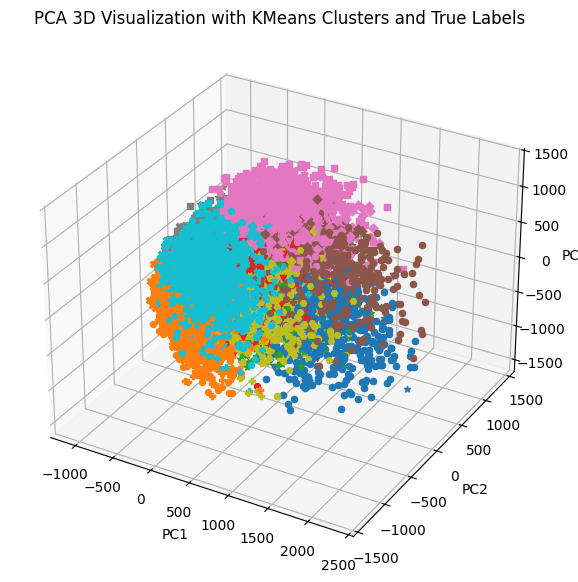

In [40]:
shape_map = {0: 'o', 1: '^', 2: '*', 3: 's', 4: 'P', 5: 'D', 6: 'H', 7: 'X', 8: 'v', 9: '8'}
color_map = cm.get_cmap('tab10')

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


for i in range(len(X_pca)):
    ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], 
               c=[color_map(clusterCentroids[i])], marker=shape_map[int(y_sample.iloc[i])], label=str(y_sample.iloc[i]))

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA 3D Visualization with KMeans Clusters and True Labels')
plt.show()


/var/folders/mg/w4cw2nc563q822jj2x4x_qqh0000gn/T/ipykernel_4650/3042007431.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', 10)  # Using 'tab10' colormap for 10 clusters


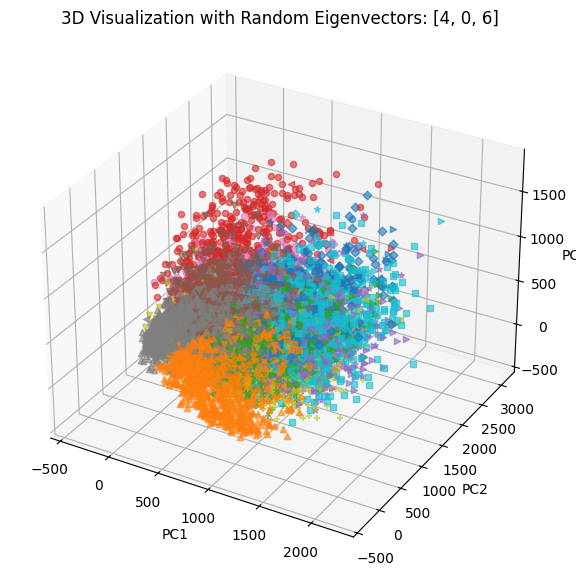

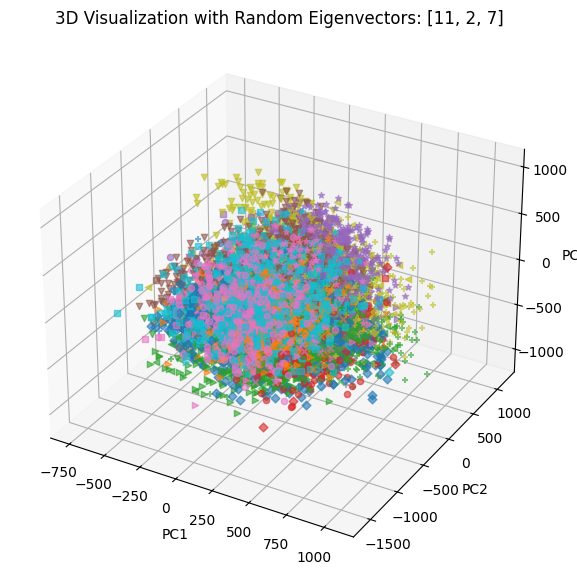

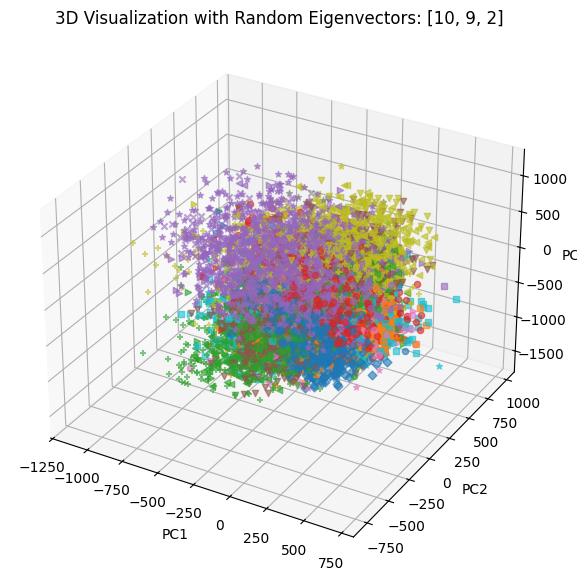

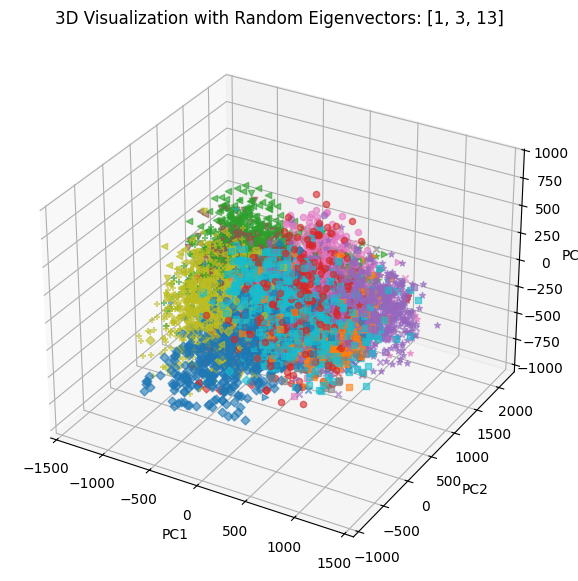

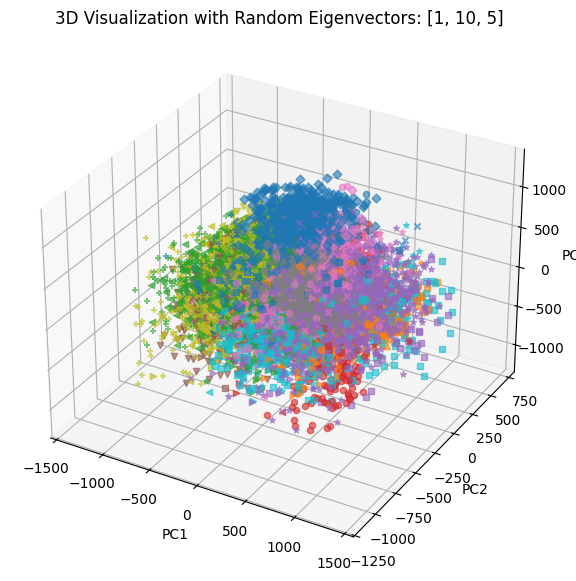

In [ ]:
color_map = cm.get_cmap('tab10', 10) 
shape_map = ['o', '^', 's', '*', '+', 'x', 'D', 'v', '>', '<'] 
top_20_eigenvectors = pca.components_[:20]

def plot_with_random_eigenvectors():
    indices = random.sample(range(20), 3)
    selected_eigenvectors = top_20_eigenvectors[indices]  
    X_random_pca = X_sample.dot(selected_eigenvectors.T).values 

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(X_random_pca)):
        label = y_sample.iloc[i, 0] if isinstance(y_sample, pd.DataFrame) else y_sample.iloc[i]
        ax.scatter(
            X_random_pca[i, 0], X_random_pca[i, 1], X_random_pca[i, 2], 
            color=color_map(clusterCentroids[i] / 10),
            marker=shape_map[int(label)],
            alpha=0.6
        )

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.title(f'3D Visualization with Random Eigenvectors: {indices}')
    plt.show()

for _ in range(5):
    plot_with_random_eigenvectors()
